# **Importing required Libraries**

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# **Importing Training Dataset and Testing Dataset**

In [111]:
train_data = pd.read_csv('/content/Training Dataset _ DS-ML - Training Dataset.csv')
test_data = pd.read_csv('/content/Test Dataset _ DS_ML - Test Dataset.csv')

# **Reviewing Train and Test Data**

In [112]:
train_data.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76


In [113]:
test_data.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,Jun-21,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,Jun-21,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,Jun-21,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,Jun-21,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,Jun-21,169.42


# **Data Pre-analysis and Pre-processing**

In [114]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ProductType        550176 non-null  object 
 1   Manufacturer       550176 non-null  object 
 2   Area Code          550176 non-null  object 
 3   Sourcing Channel   550176 non-null  object 
 4   Product Size       550176 non-null  object 
 5   Product Type       550176 non-null  object 
 6   Month of Sourcing  550176 non-null  object 
 7   Sourcing Cost      550176 non-null  float64
dtypes: float64(1), object(7)
memory usage: 33.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductType        96 non-null     object 
 1   Manufacturer       96 non-null     object 
 2   Area Code          96 non-null     object 
 3   

In [115]:
train_data.nunique()
test_data.nunique()

ProductType           3
Manufacturer          3
Area Code            45
Sourcing Channel      4
Product Size          3
Product Type          2
Month of Sourcing     1
Sourcing Cost        95
dtype: int64

In [116]:
train_data.isnull().sum()

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

In [117]:
test_data.isnull().sum()

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

In [118]:
(train_data.isnull().sum()/(len(train_data)))*100

ProductType          0.0
Manufacturer         0.0
Area Code            0.0
Sourcing Channel     0.0
Product Size         0.0
Product Type         0.0
Month of Sourcing    0.0
Sourcing Cost        0.0
dtype: float64

In [119]:
(test_data.isnull().sum()/(len(test_data)))*100

ProductType          0.0
Manufacturer         0.0
Area Code            0.0
Sourcing Channel     0.0
Product Size         0.0
Product Type         0.0
Month of Sourcing    0.0
Sourcing Cost        0.0
dtype: float64

# **Columns**

In [120]:
train_data.columns

Index(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type', 'Month of Sourcing', 'Sourcing Cost'],
      dtype='object')

In [121]:
test_data.columns

Index(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type', 'Month of Sourcing', 'Sourcing Cost'],
      dtype='object')

# **Detecting Outliers in Train and Test Data**

# **Z-score Method**

Train Data

In [122]:
outliers = []
def detect_outliers_zscore_train(train_data):
    thres = 3
    mean = np.mean(train_data)
    std = np.std(train_data)
    for i in train_data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

In [123]:
detect_outliers_zscore_train

<function __main__.detect_outliers_zscore_train(train_data)>

Test Data

In [124]:
outliers = []
def detect_outliers_zscore_test(test_data):
    thres = 3
    mean = np.mean(test_data)
    std = np.std(test_data)
    for i in test_data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

In [125]:
detect_outliers_zscore_test

<function __main__.detect_outliers_zscore_test(test_data)>

# **Inter Quartile Range Method**

Train Data

In [126]:
outliers = []
def detect_outliers_iqr_train(train_data):
    data = sorted(train_data)
    q1 = np.percentile(train_data, 25)
    q3 = np.percentile(train_data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

In [127]:
detect_outliers_iqr_train

<function __main__.detect_outliers_iqr_train(train_data)>

Test Data

In [128]:
outliers = []
def detect_outliers_iqr_test(test_data):
    data = sorted(test_data)
    q1 = np.percentile(test_data, 25)
    q3 = np.percentile(test_data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

In [129]:
detect_outliers_iqr_test

<function __main__.detect_outliers_iqr_test(test_data)>

# **EDA of Test Data**

In [130]:
test_data.columns

Index(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type', 'Month of Sourcing', 'Sourcing Cost'],
      dtype='object')

In [131]:
df_2= pd.read_csv("/content/Test Dataset _ DS_ML - Test Dataset.csv", usecols=['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type', 'Sourcing Cost'])
df_2

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,169.42
...,...,...,...,...,...,...,...
91,NTM3,X1,A44,DIRECT,Small,Liquid,89.57
92,NTM3,X1,A8,DIRECT,Large,Powder,114.57
93,NTM3,X1,A8,DIRECT,Small,Powder,111.26
94,NTM3,X2,A20,DIRECT,Large,Powder,32.32


In [132]:
df_2.describe()

,Sourcing Cost
count,96.000000
mean,106.208021
std,52.359484
min,4.140000
25%,59.662500
50%,117.245000
75%,144.915000
max,234.710000


In [133]:
df_2.dtypes

ProductType          object
Manufacturer         object
Area Code            object
Sourcing Channel     object
Product Size         object
Product Type         object
Sourcing Cost       float64
dtype: object

In [134]:
Categorical_Variables=df_2.select_dtypes(include=['object']).columns
Categorical_Variables

Index(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type'],
      dtype='object')

In [135]:
Numerical_Variables = df_2.select_dtypes(include=['int64','float64']).columns
Numerical_Variables

Index(['Sourcing Cost'], dtype='object')

In [136]:
num_cols=Numerical_Variables.tolist()
num_cols

['Sourcing Cost']

# **EDA Univariate Analysis**

<Axes: xlabel='ProductType', ylabel='count'>

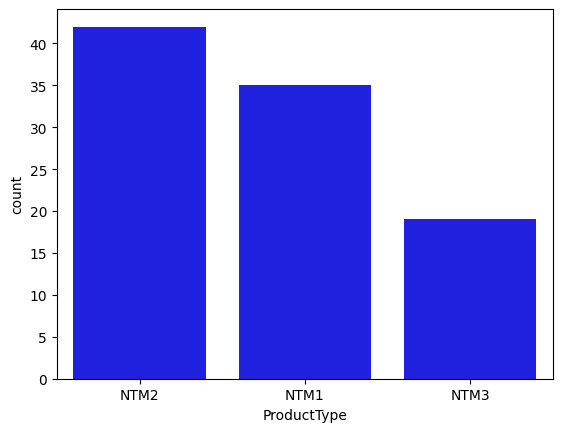

In [137]:
sns.countplot(x = 'ProductType', data = df_2, color = 'blue',
              order = df_2['ProductType'].value_counts().index)

<Axes: xlabel='Manufacturer', ylabel='count'>

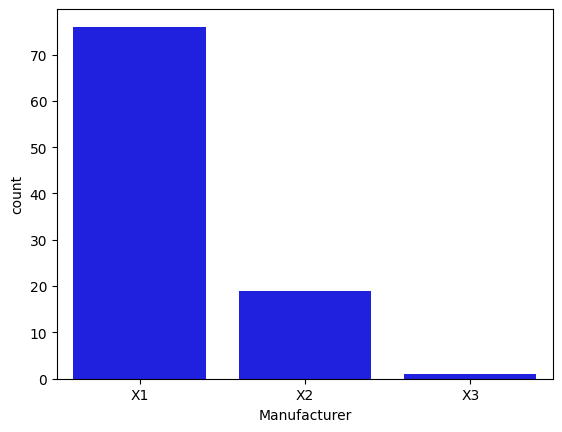

In [138]:
sns.countplot(x = 'Manufacturer', data = df_2, color = 'blue',
              order = df_2['Manufacturer'].value_counts().index)

<Axes: xlabel='Area Code', ylabel='count'>

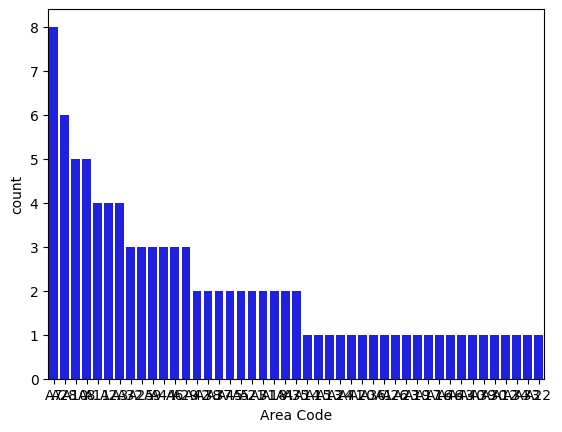

In [139]:
sns.countplot(x = 'Area Code', data = df_2, color = 'blue',
              order = df_2['Area Code'].value_counts().index)

<Axes: xlabel='Sourcing Channel', ylabel='count'>

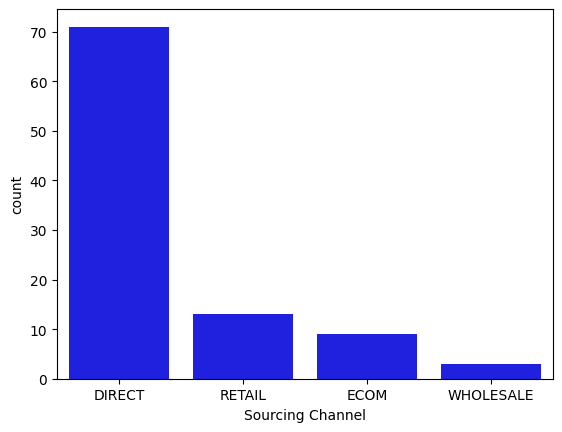

In [140]:
sns.countplot(x = 'Sourcing Channel', data = df_2, color = 'blue',
              order = df_2['Sourcing Channel'].value_counts().index)

<Axes: xlabel='Product Size', ylabel='count'>

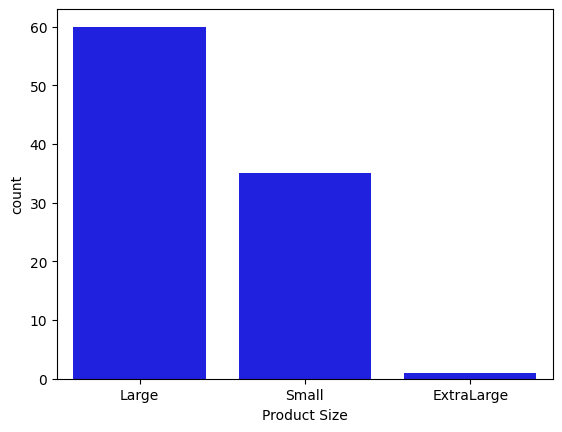

In [141]:
sns.countplot(x = 'Product Size', data = df_2, color = 'blue',
              order = df_2['Product Size'].value_counts().index)

<Axes: xlabel='Product Type', ylabel='count'>

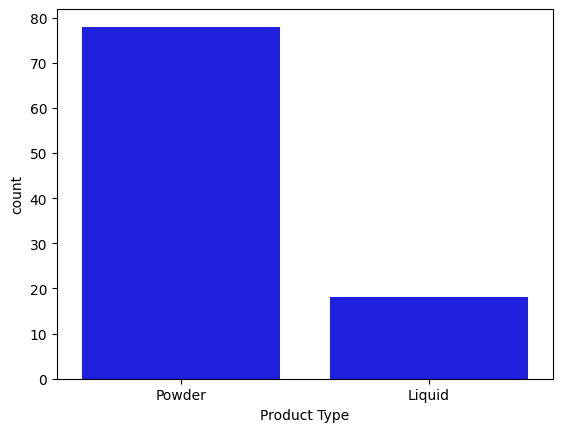

In [142]:
sns.countplot(x = 'Product Type', data = df_2, color = 'blue',
              order = df_2['Product Type'].value_counts().index)

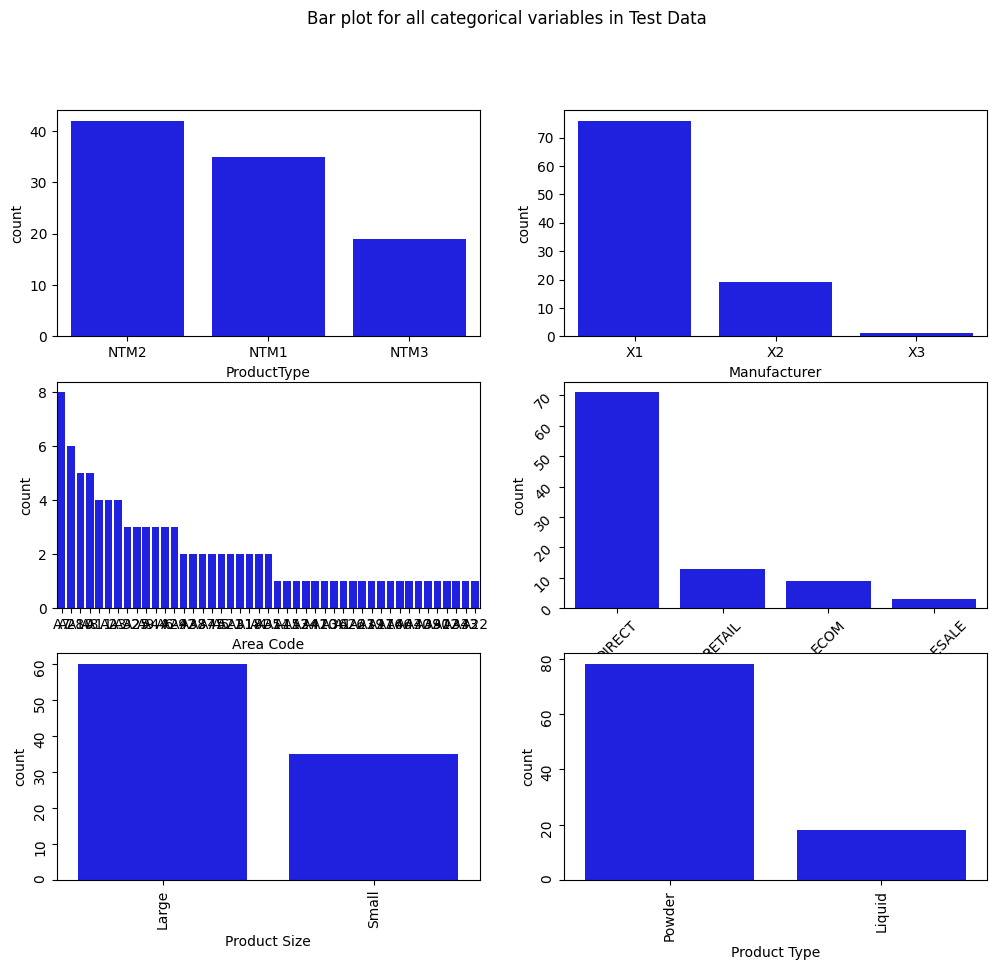

In [143]:
fig, axes = plt.subplots(3, 2, figsize = (12, 10))

fig.suptitle('Bar plot for all categorical variables in Test Data')


sns.countplot(ax = axes[0, 0], x = 'ProductType', data = df_2, color = 'blue',
              order = df_2['ProductType'].value_counts().index);


sns.countplot(ax = axes[0, 1], x = 'Manufacturer', data = df_2, color = 'blue',
              order = df_2['Manufacturer'].value_counts().index);


sns.countplot(ax = axes[1, 0], x = 'Area Code', data = df_2, color = 'blue',
              order = df_2['Area Code'].value_counts().index);


sns.countplot(ax = axes[1, 1], x = 'Sourcing Channel', data = df_2, color = 'blue',
              order = df_2['Sourcing Channel'].value_counts().index);


sns.countplot(ax = axes[2, 0], x = 'Product Size', data = df_2, color = 'blue',
              order = df_2['Product Size'].head(20).value_counts().index);

sns.countplot(ax = axes[2, 1], x = 'Product Type', data = df_2, color = 'blue',
              order = df_2['Product Type'].head(20).value_counts().index);

axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

# **Draw Histogram and Box Plot for Continuous Variables**

Sourcing Cost
Skew : -0.12


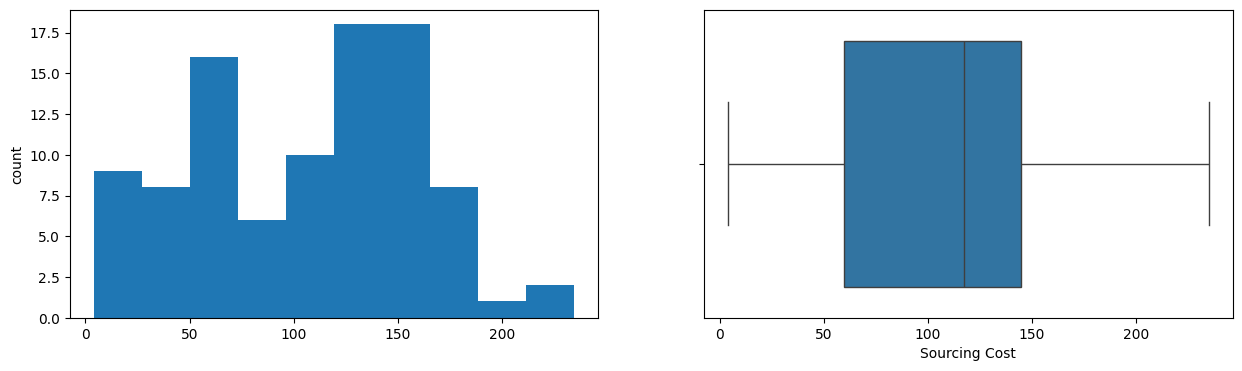

In [144]:
for col in num_cols:
    print(col)
    print('Skew :', round(df_2[col].skew(), 2))
    plt.figure(figsize = (15, 4))


    plt.subplot(1, 2, 1)
    df_2[col].hist(grid=False)
    plt.ylabel('count')


    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_2[col])
    plt.show()

# **EDA Bivariate Analysis**

<Figure size 1300x1700 with 0 Axes>

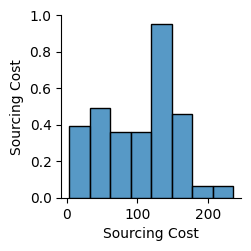

In [145]:
plt.figure(figsize=(13,17))
sns.pairplot(data=df_2)
plt.show()

<Axes: xlabel='ProductType'>

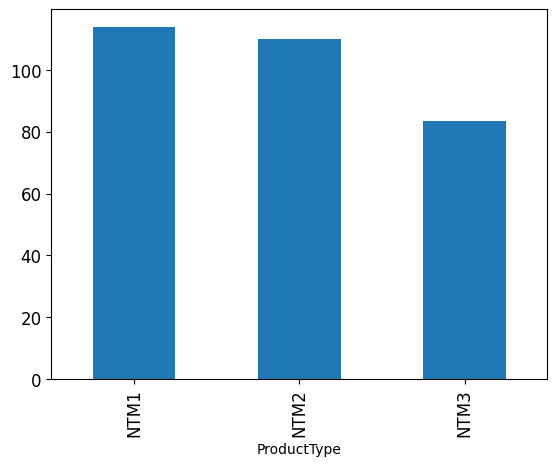

In [146]:
df_2.groupby('ProductType')['Sourcing Cost'].mean().sort_values(ascending=False).plot.bar(fontsize=12)

<Axes: xlabel='Manufacturer'>

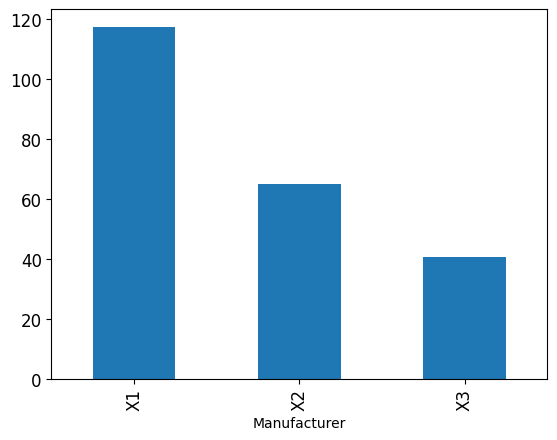

In [147]:
df_2.groupby('Manufacturer')['Sourcing Cost'].mean().sort_values(ascending=False).plot.bar(fontsize=12)

<Axes: xlabel='Area Code'>

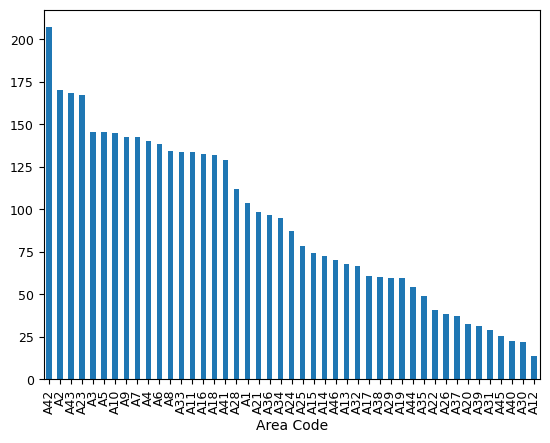

In [148]:
df_2.groupby('Area Code')['Sourcing Cost'].mean().sort_values(ascending=False).plot.bar(fontsize=9)

<Axes: xlabel='Sourcing Channel'>

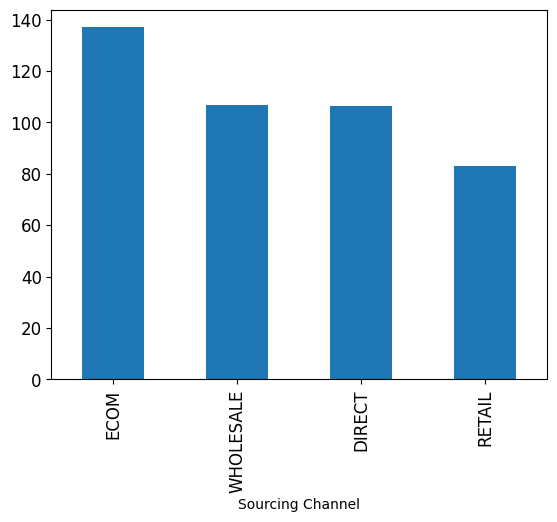

In [149]:
df_2.groupby('Sourcing Channel')['Sourcing Cost'].mean().sort_values(ascending=False).plot.bar(fontsize=12)

<Axes: xlabel='Product Size'>

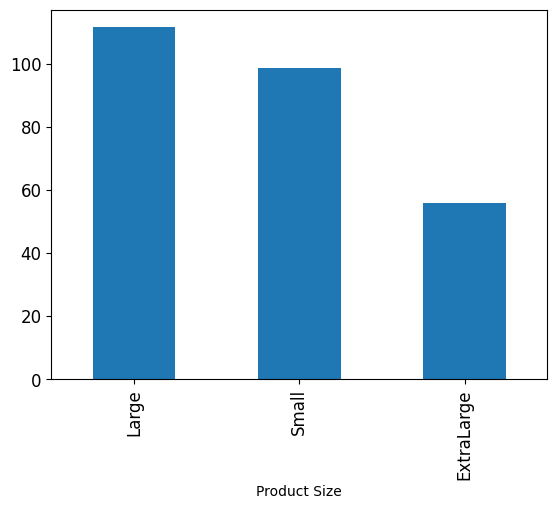

In [150]:
df_2.groupby('Product Size')['Sourcing Cost'].mean().sort_values(ascending=False).plot.bar(fontsize=12)

<Axes: xlabel='Product Type'>

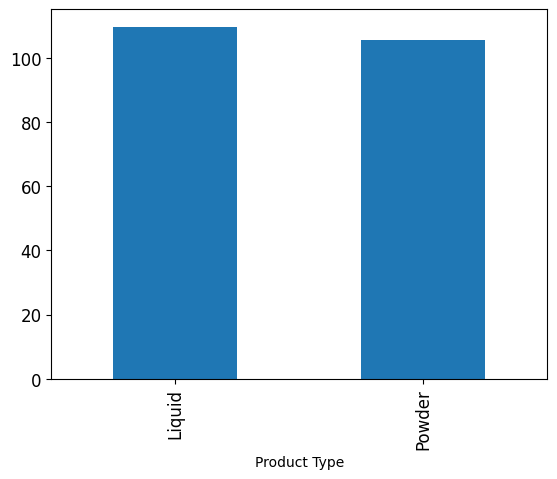

In [151]:
df_2.groupby('Product Type')['Sourcing Cost'].mean().sort_values(ascending=False).plot.bar(fontsize=12)

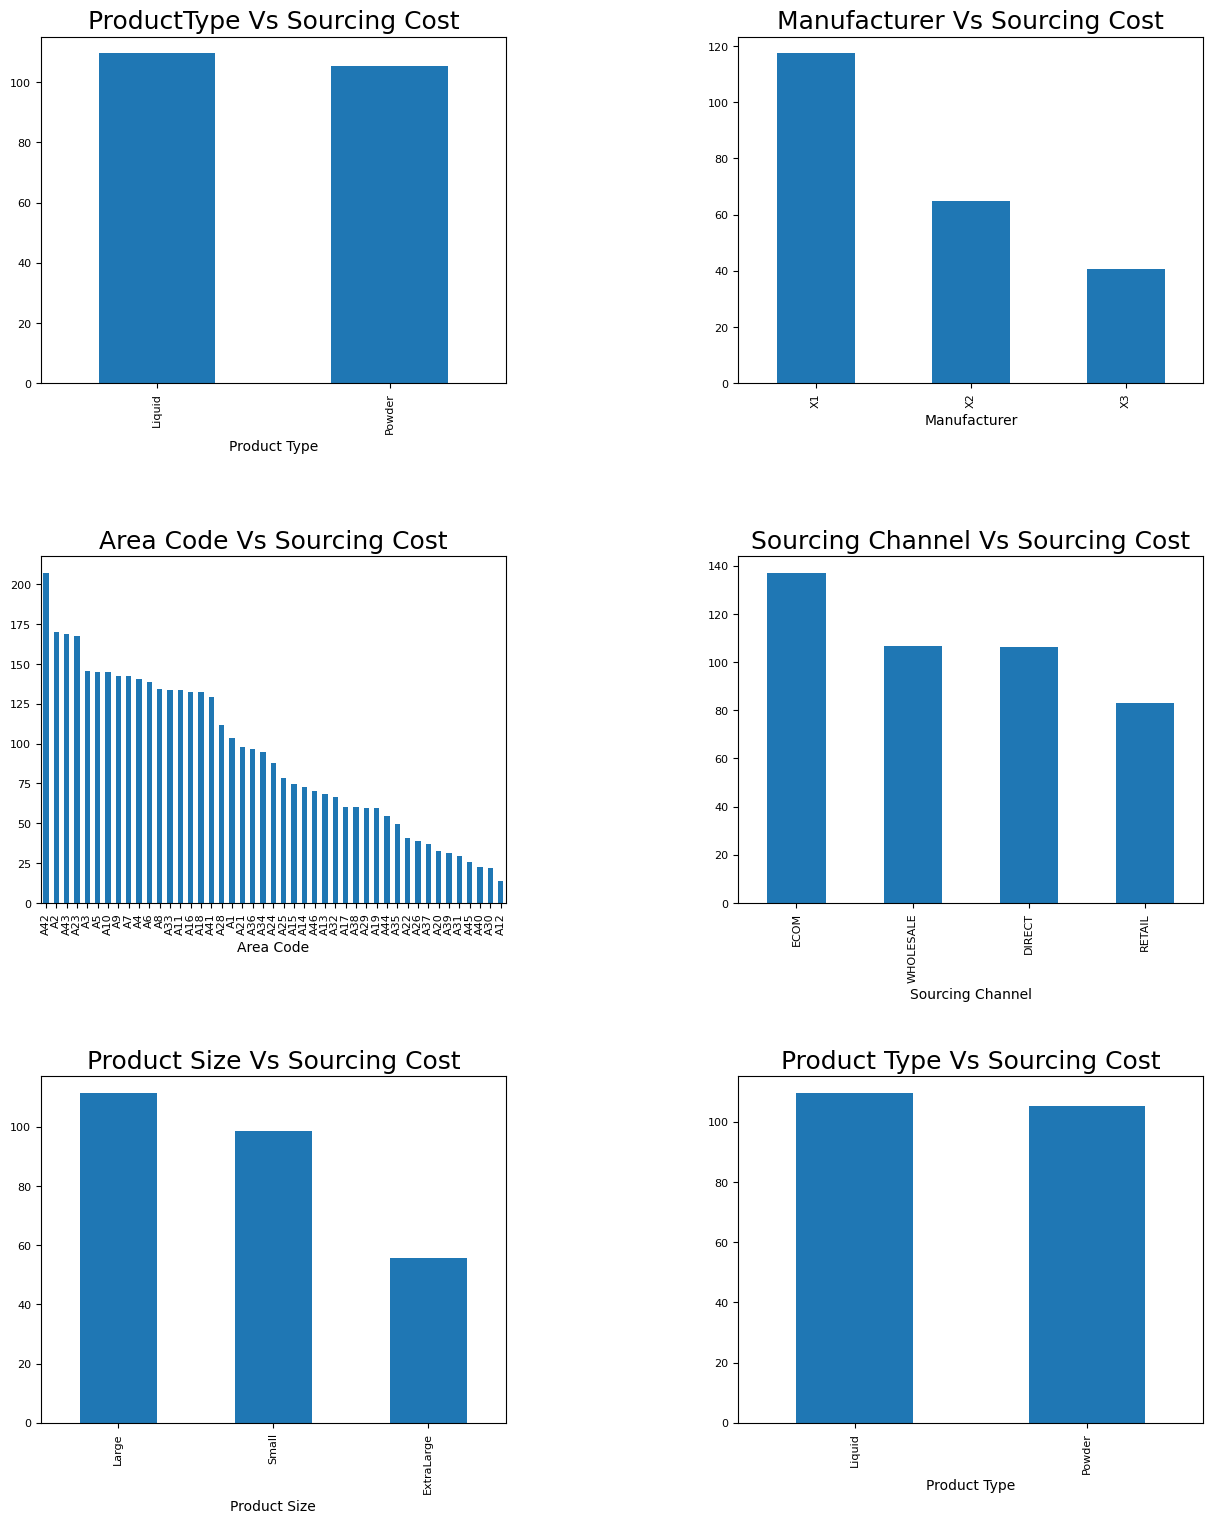

In [152]:
fig, axarr = plt.subplots(3, 2, figsize=(15, 18))

df_2.groupby('Product Type')['Sourcing Cost'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=8)
axarr[0][0].set_title("ProductType Vs Sourcing Cost", fontsize=18)

df_2.groupby('Manufacturer')['Sourcing Cost'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=8)
axarr[0][1].set_title("Manufacturer Vs Sourcing Cost", fontsize=18)

df_2.groupby('Area Code')['Sourcing Cost'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=8)
axarr[1][0].set_title("Area Code Vs Sourcing Cost", fontsize=18)

df_2.groupby('Sourcing Channel')['Sourcing Cost'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=8)
axarr[1][1].set_title("Sourcing Channel Vs Sourcing Cost", fontsize=18)

df_2.groupby('Product Size')['Sourcing Cost'].mean().sort_values(ascending=False).plot.bar(ax=axarr[2][0], fontsize=8)
axarr[2][0].set_title("Product Size Vs Sourcing Cost", fontsize=18)

df_2.groupby('Product Type')['Sourcing Cost'].mean().sort_values(ascending=False).plot.bar(ax=axarr[2][1], fontsize=8)
axarr[2][1].set_title("Product Type Vs Sourcing Cost", fontsize=18)

plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.5)

# **Different Analysis Techniques**

# **Univariate Analysis Vs Bivariate Analysis**



### **-> Univariate Analysis**



**Definition:** Univariate analysis refers to the examination of a single variable in isolation to understand its distribution and properties.

**Objective:** The objective is to identify the central tendency, dispersion, skewness, and other statistical properties of the variable.

**Techniques:** Techniques such as histograms, frequency distributions, box plots, summary statistics (mean, median, mode), and measures of variability (standard deviation, variance) are commonly used in univariate analysis.

**Insights:** This method helps to identify outliers, understand the range and spread of values, and detect patterns or anomalies within a single variable.




### **-> Bivariate Analysis**

**Definition:** Bivariate analysis, on the other hand, explores the relationship between two variables simultaneously.

**Objective:** The objective is to understand how changes in one variable are associated with changes in another variable.

**Techniques:** Techniques such as scatter plots, correlation coefficients, covariance, and cross-tabulation (for categorical variables) are used in bivariate analysis.

**Insights:** This method helps to identify correlations, associations, or dependencies between variables. It provides insights into potential cause-and-effect relationships or patterns of co-variation between variables.

# **Different Approaches for Detecting Outliers in Datasets**

# **Z-score Method Vs Inter Quartile Range Method**

### **-> Z-score Method:**

**Definition:** The Z-score measures how many standard deviations a data point is from the mean of the dataset. It is calculated as 𝑍=(𝑋−𝜇)/𝜎, where 𝑋 is the data point, 𝜇 is the mean, and 𝜎 is the standard deviation.

**Identification of Outliers:** Data points with Z-scores beyond a certain threshold (typically ±3 or ±2.5) are considered outliers.

**Sensitivity to Distribution:** The Z-score method assumes that the data follow a normal distribution. It may not work well for datasets with non-normal distributions.

### **-> Interquartile Range (IQR) Method:**

**Definition:** The IQR is a measure of statistical dispersion, representing the range between the first quartile (Q1) and the third quartile (Q3) of the dataset. It is calculated as 𝐼𝑄𝑅=𝑄3−𝑄1 .

**Identification of Outliers:** Outliers are identified as data points that fall below 𝑄1−1.5×𝐼𝑄𝑅 or above 𝑄3+1.5×𝐼𝑄𝑅. This range is sometimes extended to 𝑄1−3×𝐼𝑄𝑅 and 𝑄3+3×𝐼𝑄𝑅 for more extreme outliers.

**Robustness:** The IQR method is robust against outliers and does not assume any specific distribution of the data. It works well even for datasets with non-normal distributions or extreme values.


# **Conclusion**

In this coding challenge we were given two datasets that are training dataset and testing dataset. We use traing dataset to perform data pre-performing and understanding and gaining insights related to characteristics and stats of the data structure and the data. Later on we use testing dataset for performing different variants of exploratory data analysis that are Univariate analysis and Bivariate analysis, along with detecting and neutralising outliers (no outlier detected in any of given datasets) by using different detecting methods that are Z-score method and IQR (Inter Quartile Range) method. At last we conclude by getting multiple plots and histograms that corelates and analyses different features and parameters described in dataset.